# Model Selection - Example

## Example Model
Measurement data are simulation results with the "true" model. The comprehensive model includes additional behaviour involving a third parameter. Hence, during model selection, models with $\theta_3=0$ should be preferred.

![](model_selection_network.jpeg)


# Model Space Specifications File

The model selection specification file can be written in the following compressed format.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | 0;estimate  |

Alternatively, models can be explicitly specified. The below table is equivalent to the above table.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1_0	| example_modelSelection.yaml	| 0	  | 0   |	0 | 
| M1_1	| example_modelSelection.yaml	| 0	  | 0	| estimate |
| M1_2	| example_modelSelection.yaml	| 0	  | estimate |	0 |
| M1_3	| example_modelSelection.yaml	| estimate |	0	| 0 |
| M1_4	| example_modelSelection.yaml	| 0	  | estimate |	estimate |
| M1_5	| example_modelSelection.yaml	| estimate |	0   |	estimate |
| M1_6	| example_modelSelection.yaml	| estimate |	estimate |	0 |
| M1_7	| example_modelSelection.yaml	| estimate | estimate |	estimate |

Either of the above tables (as [.tsv](https://en.wikipedia.org/wiki/Tab-separated_values) files) are valid inputs. Any combinations of cells in the compressed or explicit format is also acceptable, including the following example.

| model_id | petab_yaml                             | $\theta_1$ | $\theta_2$ | $\theta_3$ |
|:---------|:----------------------------------|:----|:----|:----|
| M1      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | 0  |
| M2      | example_modelSelection.yaml | 0;estimate  | 0;estimate  | estimate  |

Internally, estimated parameters (`estimate`) are represented by `float('nan')`.

Due to the topology of the example model, setting $\theta_1$ to zero can result in a model with no dynamics. Hence, for this example, some parameters are set to non-zero fixed values. These parameters are not considered as estimated values in criterion (e.g. AIC) calculations.

The model specification table used in this notebook is copied below.

| model_id | petab_yaml                  | k1       | k2       | k3       |
|----------|-----------------------------|----------|----------|----------|
| M1_0     | example_modelSelection.yaml | 0        | 0        | 0        |
| M1_1     | example_modelSelection.yaml | 0.2      | 0.1      | estimate |
| M1_2     | example_modelSelection.yaml | 0.2      | estimate | 0        |
| M1_3     | example_modelSelection.yaml | estimate | 0.1      | 0        |
| M1_4     | example_modelSelection.yaml | 0.2      | estimate | estimate |
| M1_5     | example_modelSelection.yaml | estimate | 0.1      | estimate |
| M1_6     | example_modelSelection.yaml | estimate | estimate | 0        |
| M1_7     | example_modelSelection.yaml | estimate | estimate | estimate |

In [1]:
model_spec_file = './model_selection/modelSelectionSpecification_example_modelSelection.tsv'
import pypesto.select as ms
#from petab_select import read_model_specification_file
import petab_select
from petab_select import ModelSpace, FORWARD, BACKWARD
selection_problem = petab_select.Problem.from_yaml('model_selection/selection_problem.yaml')
#model_space = ModelSpace.from_file(model_spec_file)
#f = read_model_specification_file(model_spec_file)
#f = ms.unpack_file(model_spec_file)
#f.seek(0)
#print(f.read())

# Forward Selection, Multiple Searches
Here, we show a typical workflow for model selection. First, a [PEtab](https://github.com/petab-dev/petab) problem is created. This is used to initialise a `ModelSelector`, along with a model specifications file.

In [2]:
petab_YAML = './model_selection/example_modelSelection.yaml'
#import pypesto.model_selection
import logging
import pypesto.logging
pypesto.logging.log(level=logging.INFO, name='pypesto.model_selection', console=True)
import petab

#petab_problem = petab.Problem.from_yaml(petab_YAML)
selector = ms.ModelSelector(problem=selection_problem)

Models can be selected with a model selection algorithm ([forward](https://en.wikipedia.org/wiki/Stepwise_regression)) and a comparison criterion ([AIC](https://en.wikipedia.org/wiki/Akaike_information_criterion)).

In [3]:
# Reduce notebook runtime 
minimize_options = {
    'n_starts': 1,
}

selected_models, _, selection_history = selector.select('forward', 'AIC', minimize_options=minimize_options)

----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=17.4874, time=0.1842s, n_fval=24.
100%|██████████| 1/1 [00:00<00:00,  5.39it/s]
Starting with model: M1_1_0

Old ID	New ID	Crit	Old	New	Diff	Result
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.1677s, n_fval=44.
100%|██████████| 1/1 [00:00<00:00,  5.92it/s]
M1_1_0	M1_2_0	AIC	42.975	-0.275	-43.249	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.3527, time=0.2028s, n

Plotting routines are available, to visualise the best model at each iteration of the selection process.

[]

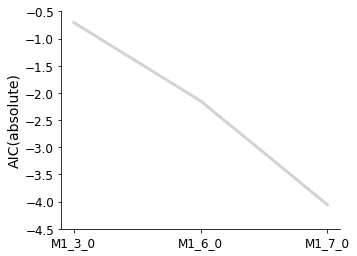

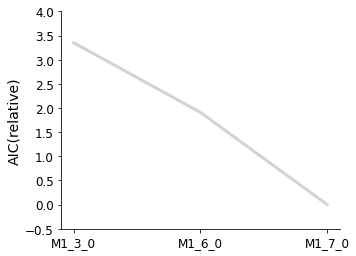

In [4]:
import pypesto.visualize.select as ms_vis
from petab_select import (
    AIC,
    AICC,
    BIC,
)
ax = ms_vis.plot_selected_models(selected_models, criterion=AIC, relative=False)
ax = ms_vis.plot_selected_models(selected_models, criterion=AIC)
ax.plot()

To search more of the model space, the algorithm can be repeated. As models with 1 or less estimated parameters have already been tested, subsequent `select` calls will begin with the next simplest model (in this case, models with exactly 2 estimated parameters), and move on to more complex models, while each iteration improves the criterion and additional valid models are available for testing.

In [5]:
selected_models, local_selection_history, selection_history = selector.select('forward',
                                                                              'AIC',
                                                                              minimize_options=minimize_options)

----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Parameters obtained from history and optimizer do not match: [1.00000000e+03 2.16174194e+01 8.52416648e-01], [1.00000000e+03 2.16144868e+01 8.52504730e-01]
Final fval=7.5556, time=0.4257s, n_fval=92.
100%|██████████| 1/1 [00:00<00:00,  2.34it/s]
Starting with model: M1_4_0

Old ID	New ID	Crit	Old	New	Diff	Result


[]

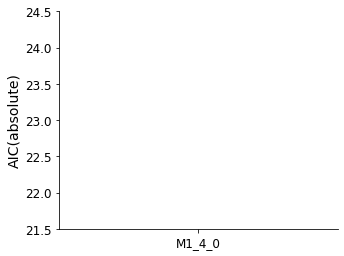

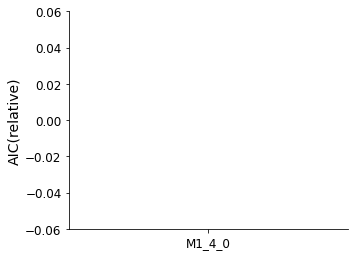

In [6]:
ax = ms_vis.plot_selected_models(selected_models, criterion='AIC', relative=False)
ax = ms_vis.plot_selected_models(selected_models, criterion='AIC')
ax.plot()

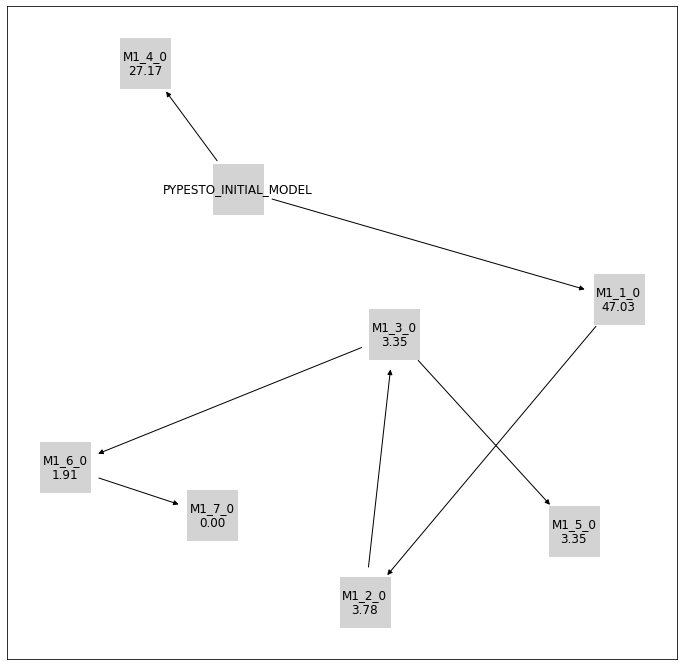

In [7]:
ms_vis.plot_history_digraph(selection_history)

# Backward Selection, Custom Initial Model
Backward selection is specified by changing the algorithm from `'forward'` to `'backward'`in the `ModelSelector.select()` call.

A custom initial model is specified with the optional `initial_model` argument of `ModelSelector.select()`. If no initial model is specified, then a virtual model is used for the purpose of finding the next valid models. For example, in forward selection, the initial virtual model with all parameters set to zero is used to find the next models to be tested. For backward selection, the initial virtual model has all parameters set to be estimated.

In [8]:
from pprint import pprint
from petab_select import Model
#selector2 = ms.ModelSelector(petab_problem, model_spec_file)
#model_space.reset()
selection_problem.model_space.reset()
selector2 = ms.ModelSelector(problem=selection_problem)
initial_model = Model(
    model_id='myModel',
    petab_yaml='model_selection/example_modelSelection.yaml',
    parameters=dict(
        k1=float(0.1),
        k2=float('nan'),
        k3=float('nan'),
    )
)
#initial_model = dict(zip(selector2.header, ['myModel', 'not_implemented.xml', float(0.1), float('nan'), float('nan')]))
#print(f'Model specifications file column headers: {selector2.header}')
print('Initial model:')
print(initial_model)

Initial model:
model_id	petab_yaml	k1	k2	k3
myModel	model_selection/example_modelSelection.yaml	0.1	nan	nan


In [9]:
selected_models, local_selection_history, selection_history = selector2.select('backward',
                                                                               'AIC',
                                                                               initial_model=initial_model,
                                                                               minimize_options=minimize_options)

----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=11.8924, time=0.2207s, n_fval=40.
100%|██████████| 1/1 [00:00<00:00,  4.51it/s]
Starting with model: myModel

Old ID	New ID	Crit	Old	New	Diff	Result
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.


myModel


Final fval=-4.0877, time=0.0709s, n_fval=14.
100%|██████████| 1/1 [00:00<00:00, 13.91it/s]
myModel	M1_1_0	AIC	31.785	-0.175	-31.960	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.1518s, n_fval=42.
100%|██████████| 1/1 [00:00<00:00,  6.54it/s]
M1_1_0	M1_2_0	AIC	-0.175	-0.275	-0.099	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=17.4876, time=0.0810s, n_fval=23.
100%|██████████| 1/1 [00:00<00:00, 12.22it/s]
M1_2_0	M1_0_0	AIC	-0.275	42.975	43.250	Rejected


[]

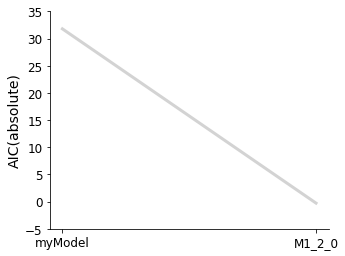

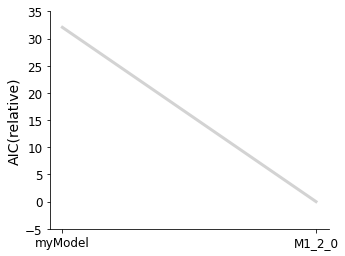

In [10]:
ax = ms_vis.plot_selected_models(selected_models, criterion='AIC', relative=False)
ax = ms_vis.plot_selected_models(selected_models, criterion='AIC')
ax.plot()

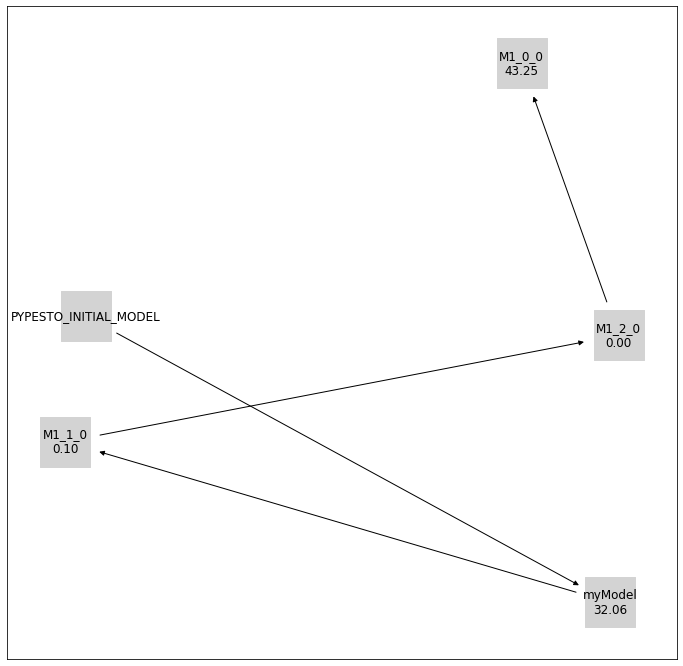

In [11]:
ms_vis.plot_history_digraph(selection_history)

# Additional Options
There exist additional options that can be used to further customise selection algorithms.
## Select First Improvement
At each selection step, as soon as a model that improves on the previous model is encountered (by the specified criterion), it is selected and immediately used as the previous model in the next iteration of the selection. This is unlike the default behaviour, where all test models at each iteration are optimized, and the best of these is selected.
## Use Previous Maximum Likelihood Estimate as Startpoint
The maximum likelihood estimate parameters from the previous model is used as one of the startpoints in the multistart optimization of the test models. The default behaviour is that all startpoints are automatically generated by pyPESTO.
## Minimize Options
Optimization can be customised with a dictionary that specifies values for the corresponding keyword arguments of [minimize](https://github.com/ICB-DCM/pyPESTO/blob/master/pypesto/optimize/optimize.py).
## Criterion Options
Currently implemented options are
- [`'AIC'`](https://en.wikipedia.org/wiki/Akaike_information_criterion) (Akaike information criterion),
- [`'AICc'`](https://en.wikipedia.org/wiki/Akaike_information_criterion) (corrected AIC), and
- [`'BIC'`](https://en.wikipedia.org/wiki/Bayesian_information_criterion) (Bayesian information criterion).
### Threshold
A threshold can be specified, such that only models that improve on previous models by the threshold amount in the chosen criterion are accepted.

In [12]:
#selector3 = ms.ModelSelector(petab_problem, model_spec_file)
#model_space.reset()
selection_problem.model_space.reset()
selector3 = ms.ModelSelector(problem=selection_problem)


while True:
    try:
        _, _, selection_history = selector3.select('forward',
                                                   'BIC',
                                                   select_first_improvement=True,
                                                   startpoint_latest_mle=True,
                                                   minimize_options=minimize_options)
    except StopIteration:
        break

----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=17.4869, time=0.1570s, n_fval=28.
100%|██████████| 1/1 [00:00<00:00,  6.32it/s]
Starting with model: M1_1_0

Old ID	New ID	Crit	Old	New	Diff	Result
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.2422s, n_fval=73.
100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
M1_1_0	M1_2_0	BIC	42.141	-1.107	-43.248	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.0493s, n

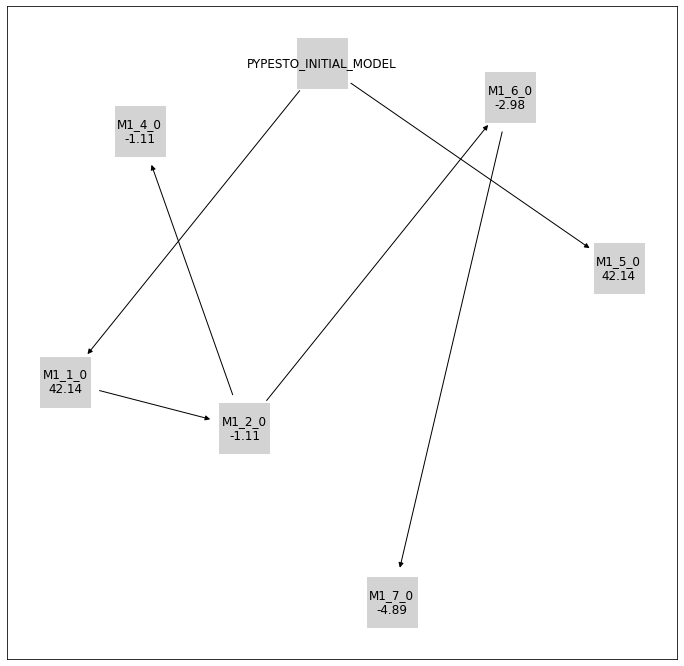

In [13]:
ms_vis.plot_history_digraph(selection_history, criterion='BIC', relative=False)

In [14]:
# Repeat with AICc and criterion_threshold == 10
#selector4 = ms.ModelSelector(petab_problem, model_spec_file)
selection_problem.model_space.reset()
selector4 = ms.ModelSelector(problem=selection_problem)


while True:
    try:
        _, _, selection_history = selector4.select('forward',
                                                   'AICc',
                                                   select_first_improvement=True,
                                                   startpoint_latest_mle=True,
                                                   minimize_options=minimize_options,
                                                   criterion_threshold=10)
    except StopIteration:
        break

----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=17.4875, time=0.1748s, n_fval=29.
100%|██████████| 1/1 [00:00<00:00,  5.68it/s]
Starting with model: M1_1_0

Old ID	New ID	Crit	Old	New	Diff	Result
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.1799s, n_fval=51.
100%|██████████| 1/1 [00:00<00:00,  5.52it/s]
M1_1_0	M1_2_0	AICc	82.975	39.725	-43.250	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.1373, time=0.0060s, 

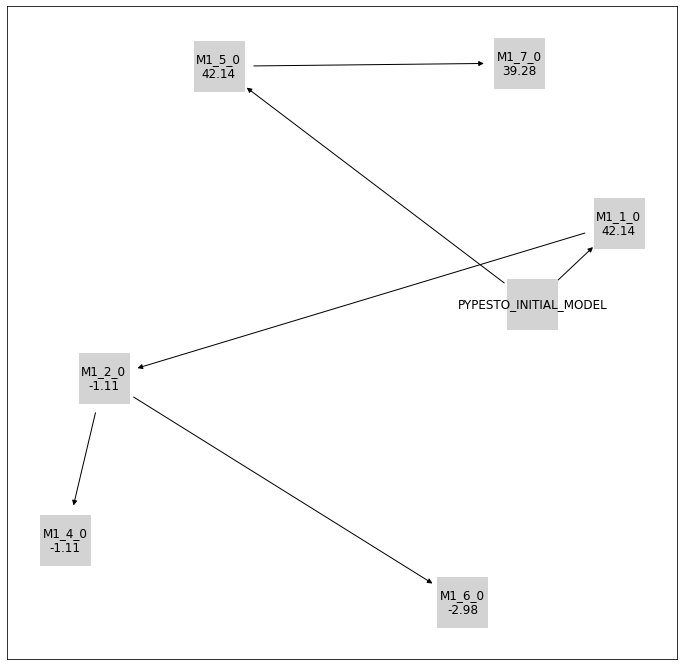

In [15]:
ms_vis.plot_history_digraph(selection_history, criterion='BIC', relative=False)

# Multistart
Multiple model selections can be run by specifying initial models to be tested.

In [16]:
#selector5 = ms.ModelSelector(petab_problem, model_spec_file)
#model_space.reset()
selection_problem.model_space.reset()
selector5 = ms.ModelSelector(problem=selection_problem)

initial_model1 = Model(
    model_id='myModel1',
    petab_yaml='model_selection/example_modelSelection.yaml',
    parameters=dict(
        k1=float(0),
        k2=float(0),
        k3=float(0),
    )
)

initial_model2 = Model(
    model_id='myModel2',
    petab_yaml='model_selection/example_modelSelection.yaml',
    parameters=dict(
        k1=float('nan'),
        k2=float('nan'),
        k3=float(0),
    )
)

initial_models = [initial_model1, initial_model2]
selected_models, local_selection_history, selection_history = selector5.multistart_select(
    'forward',
    'AIC',
    initial_models=initial_models,
    minimize_options=minimize_options
)


----------------------New Selection---------------------
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=17.4876, time=0.0902s, n_fval=26.
100%|██████████| 1/1 [00:00<00:00, 10.97it/s]
Starting with model: myModel1

Old ID	New ID	Crit	Old	New	Diff	Result
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.


myModel1


Final fval=-4.0877, time=0.0741s, n_fval=16.
100%|██████████| 1/1 [00:00<00:00, 13.32it/s]
myModel1	M1_1_0	AIC	42.975	-0.175	-43.151	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Parameters obtained from history and optimizer do not match: [0.10147744 0.12141245], [0.10147826 0.12142139]
Final fval=-4.1373, time=0.2120s, n_fval=61.
100%|██████████| 1/1 [00:00<00:00,  4.70it/s]
M1_1_0	M1_2_0	AIC	-0.175	-0.275	-0.099	Accepted
Using existing amici model in folder /home/dilan/Documents/future_annex/model_selection/packages/pyPESTO/doc/example/amici_models/caroModel_linear.
  0%|          | 0/1 [00:00<?, ?it/s]Executing task 0.
Final fval=-4.3527, time=0.2217s, n_fval=51.
100%|██████████| 1/1 [00:00<00:00,  4.48it/s]
M1_2_0	M1_3_0	AIC	-0.275	-0.705	-0.431	Accepted
Using existing amici model in folder /home/dilan/Documents/futur

myModel2


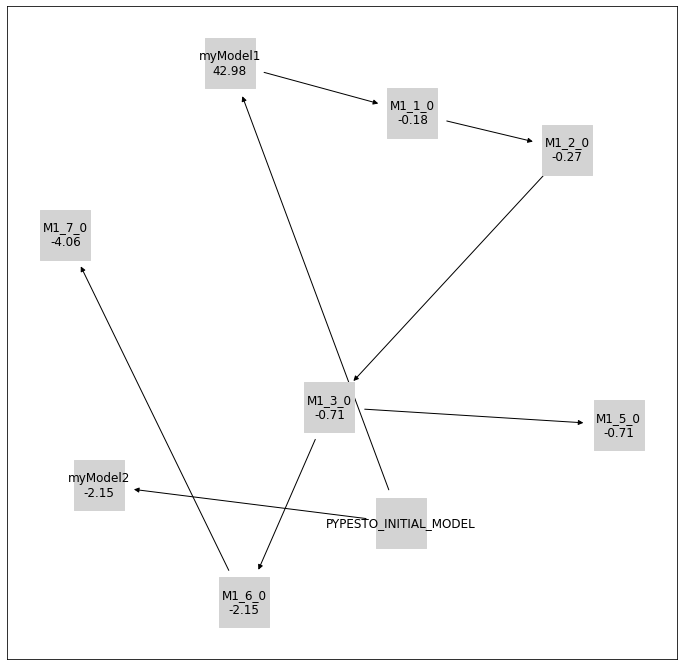

In [17]:
ms_vis.plot_history_digraph(selection_history, criterion='AIC', relative=False)